In [1]:
# Python ≥3.5 is required
import sys

import pandas as pd

assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target==0).astype(np.int32)
per_clf = Perceptron(max_iter=1000 , tol=1e-3 , random_state=42)
per_clf.fit(X,y)
y_pred = per_clf.predict([[2,0.5]])
print(y_pred)

[1]


Saving figure perceptron_iris_plot


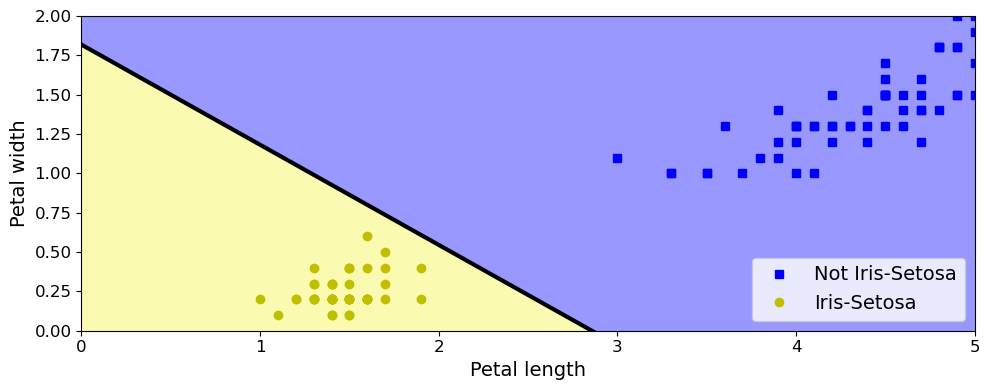

In [3]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

In [4]:
import tensorflow as tf
from tensorflow import keras
(tf.__version__)

'2.12.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full , y_train_full),(X_test , y_test)  = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid , X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test / 255.

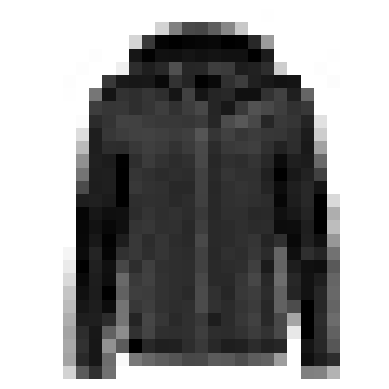

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
X_valid.shape

(5000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_plot


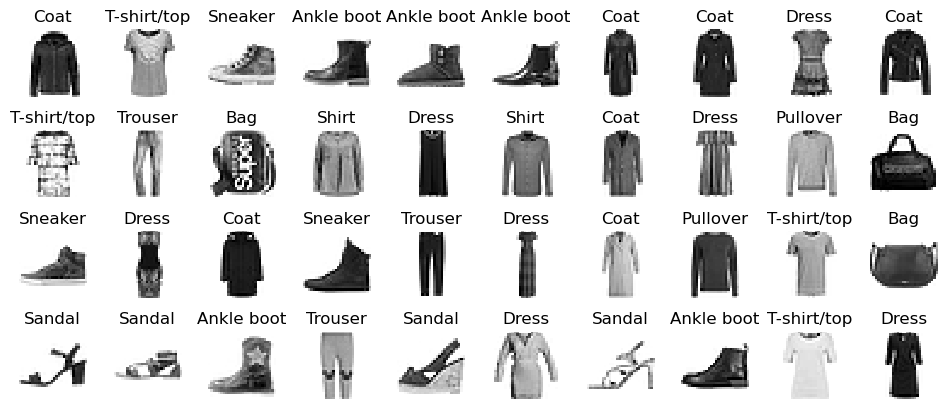

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300 , activation='relu'))
model.add(keras.layers.Dense(100 , activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
model = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=[28,28]),
     keras.layers.Dense(300 , activation='relu'),
     keras.layers.Dense(100 , activation='relu'),
     keras.layers.Dense(10, activation='softmax')
     ])

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file="my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [36]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [37]:
model.get_layer(hidden1.name) is hidden1

True

In [38]:
weights, biases = hidden1.get_weights()

In [39]:
weights

array([[ 0.04912382,  0.06271759,  0.02994382, ..., -0.05604928,
         0.05530821, -0.05300594],
       [ 0.01029931,  0.00757985,  0.04160304, ..., -0.05881926,
        -0.00532962,  0.02976071],
       [ 0.03007945,  0.07241498,  0.0725518 , ...,  0.03850374,
         0.05146579,  0.03698891],
       ...,
       [ 0.04049382,  0.0182669 , -0.0250205 , ..., -0.04010266,
        -0.05784554, -0.05018028],
       [-0.01890233, -0.05658386, -0.01832201, ...,  0.07403192,
         0.01933925,  0.01770642],
       [ 0.0498345 , -0.041382  ,  0.02146341, ..., -0.01626428,
         0.00446402,  0.03203467]], dtype=float32)

In [40]:
weights.shape

(784, 300)

In [41]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [42]:
biases.shape

(300,)

In [50]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [59]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 678us/step - loss: 0.2248 - accuracy: 0.9185 - val_loss: 0.3081 - val_accuracy: 0.8872
Epoch 2/30
1719/1719 [==============================] - 1s 659us/step - loss: 0.2207 - accuracy: 0.9209 - val_loss: 0.3039 - val_accuracy: 0.8896
Epoch 3/30
1719/1719 [==============================] - 1s 658us/step - loss: 0.2170 - accuracy: 0.9216 - val_loss: 0.2969 - val_accuracy: 0.8944
Epoch 4/30
1719/1719 [==============================] - 1s 664us/step - loss: 0.2140 - accuracy: 0.9234 - val_loss: 0.2916 - val_accuracy: 0.8940
Epoch 5/30
1719/1719 [==============================] - 1s 650us/step - loss: 0.2097 - accuracy: 0.9257 - val_loss: 0.3054 - val_accuracy: 0.8914
Epoch 6/30
1719/1719 [==============================] - 1s 658us/step - loss: 0.2061 - accuracy: 0.9264 - val_loss: 0.3059 - val_accuracy: 0.8922
Epoch 7/30
1719/1719 [==============================] - 1s 670us/step - loss: 0.2033 - accuracy: 0.9268 - val_loss: 0.2889 -

In [60]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [61]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [62]:
history.history

{'loss': [0.22483092546463013,
  0.2207009196281433,
  0.21700993180274963,
  0.21404476463794708,
  0.20968639850616455,
  0.2060661017894745,
  0.20328687131404877,
  0.20035898685455322,
  0.19668523967266083,
  0.1942213773727417,
  0.19120797514915466,
  0.18787270784378052,
  0.18461546301841736,
  0.18253877758979797,
  0.17912589013576508,
  0.17731823027133942,
  0.1728472113609314,
  0.1707163155078888,
  0.16985024511814117,
  0.1660166084766388,
  0.1636476218700409,
  0.16069786250591278,
  0.1579224020242691,
  0.15579497814178467,
  0.1523423045873642,
  0.15090946853160858,
  0.14941024780273438,
  0.14673282206058502,
  0.1437033712863922,
  0.1401035189628601],
 'accuracy': [0.9185272455215454,
  0.9208727478981018,
  0.9216363430023193,
  0.9233636260032654,
  0.92574542760849,
  0.9264000058174133,
  0.9268181920051575,
  0.9279636144638062,
  0.9292908906936646,
  0.9294909238815308,
  0.9311272501945496,
  0.9324363470077515,
  0.934109091758728,
  0.9334727525711

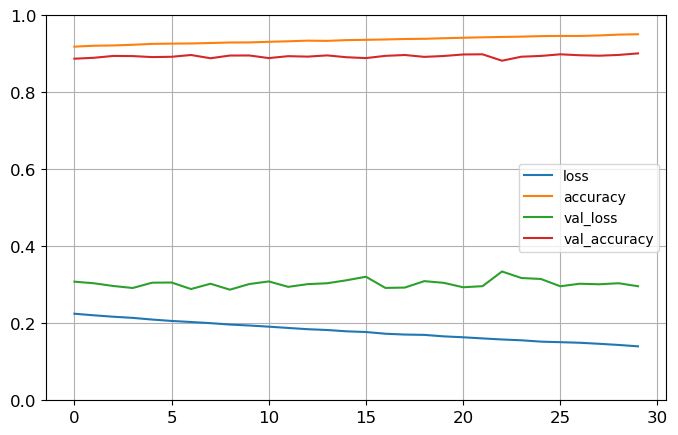

In [63]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [64]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 375us/step - loss: 0.3232 - accuracy: 0.8920


[0.32322219014167786, 0.8920000195503235]

In [65]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 36ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [66]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 10ms/step


array([9, 2, 1])

In [67]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [68]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


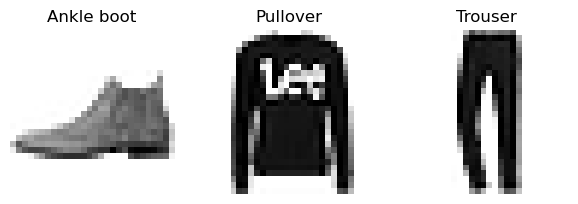

In [69]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

In [73]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [74]:
np.random.seed(42)
tf.random.set_seed(42)

In [79]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 376us/step - loss: 2.0689 - val_loss: 1.9032
Epoch 2/20
363/363 [==============================] - 0s 302us/step - loss: 0.7100 - val_loss: 1.2176
Epoch 3/20
363/363 [==============================] - 0s 302us/step - loss: 0.6347 - val_loss: 0.9406
Epoch 4/20
363/363 [==============================] - 0s 292us/step - loss: 0.5990 - val_loss: 0.7607
Epoch 5/20
363/363 [==============================] - 0s 288us/step - loss: 0.5739 - val_loss: 0.6686
Epoch 6/20
363/363 [==============================] - 0s 292us/step - loss: 0.5531 - val_loss: 0.6023
Epoch 7/20
363/363 [==============================] - 0s 294us/step - loss: 0.5368 - val_loss: 0.5626
Epoch 8/20
363/363 [==============================] - 0s 288us/step - loss: 0.5224 - val_loss: 0.5287
Epoch 9/20
363/363 [==============================] - 0s 289us/step - loss: 0.5102 - val_loss: 0.5029
Epoch 10/20
363/363 [==============================] - 0s 289us/step - loss: 0.499

1/1 [==============================] - 0s 15ms/step


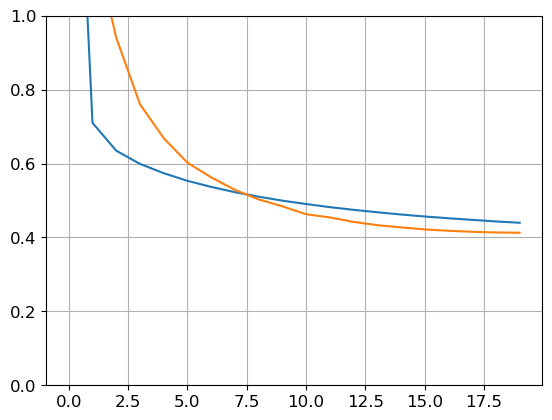

In [80]:
plt.plot(pd.DataFrame(history.history))
plt.grid("True")
plt.gca().set_ylim(0,1)
plt.show()

In [81]:
y_pred

array([[0.5986035],
       [1.6150818],
       [3.2391272]], dtype=float32)